In [6]:
# loading libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [7]:
# Importing the dataset
dataset =pd.read_csv('combined_csv.csv')
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [9]:
df = dataset

In [10]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [11]:
df[' Label'].value_counts()

BENIGN                      2273097
DoS Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack Brute Force         1507
Web Attack XSS                  652
Infiltration                     36
Web Attack Sql Injection         21
Heartbleed                       11
Name:  Label, dtype: int64

In [12]:
# Dropping columns with zero values
df = df.drop(columns=[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])

In [13]:
# Taking care of missing values
df.isnull().sum().sum()

1358

In [14]:
# Dropping entries with missing values
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [15]:
# Converting inf values to nan 
df = df.replace([np.inf, -np.inf], np.nan)

In [16]:
df.isnull().sum().sum()

3018

In [17]:
# Dropping nan values
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [18]:
df[' Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack Brute Force         1507
Web Attack XSS                  652
Infiltration                     36
Web Attack Sql Injection         21
Heartbleed                       11
Name:  Label, dtype: int64

In [19]:
# Splitting the dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, 70].values

In [20]:
# Downsampling the majority class
Down_Dic = {'BENIGN': 250000,
            'DoS Hulk': 230124,
            'PortScan': 158804,
            'DDoS': 128025,
            'DoS GoldenEye': 10293,
            'FTP-Patator': 7935,
            'SSH-Patator': 5897,
            'DoS slowloris': 5796,
           'DoS Slowhttptest': 5499,
           'Bot': 1956,
           'Web Attack Brute Force': 1507,
           'Web Attack XSS': 652,
           'Infiltration': 36,
           'Web Attack Sql Injection': 21,
           'Heartbleed': 11}

DownSamp = RandomUnderSampler(sampling_strategy=Down_Dic, random_state=0)
X,y=DownSamp.fit_sample(X,y)

In [22]:
# Up-sampling the minority classes
UP_Dic = {'BENIGN': 250000,
            'DoS Hulk': 230124,
            'PortScan': 158804,
            'DDoS': 128025,
            'DoS GoldenEye': 10293,
            'FTP-Patator': 7935,
           'SSH-Patator': 5897,
           'DoS slowloris': 5796,
           'DoS Slowhttptest': 5499,
           'Bot': 5000,
           'Web Attack Brute Force': 5000,
           'Web Attack XSS': 5000,
           'Infiltration': 5000,
           'Web Attack Sql Injection': 5000,
           'Heartbleed': 5000}

UpSamp = SMOTE(sampling_strategy=UP_Dic, random_state=0)
X,y=UpSamp.fit_sample(X,y)

In [24]:
# Encoding categorical dependent variable
y = pd.get_dummies(y)

In [25]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 42, init = 'uniform', activation = 'relu', input_dim = 70))

D:\Users\adelola\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=70, units=42, kernel_initializer="uniform")`
  """


In [29]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 42, init = 'uniform', activation = 'relu'))

D:\Users\adelola\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=42, kernel_initializer="uniform")`
  


In [30]:
# Adding the output layer
classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'softmax'))

D:\Users\adelola\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=15, kernel_initializer="uniform")`
  


In [31]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 128, nb_epoch = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\Users\adelola\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Epoch 1/100
582752/582752 [==============================] - 7s 11us/step - loss: 0.2071 - acc: 0.9380
Epoch 2/100
582752/582752 [==============================] - 6s 10us/step - loss: 0.0860 - acc: 0.9720
Epoch 3/100
582752/582752 [==============================] - 6s 11us/step - loss: 0.0759 - acc: 0.9741
Epoch 4/100
582752/582752 [==============================] - 6s 10us/step - loss: 0.0709 - acc: 0.9756
Epoch 5/100
582752/582752 [==============================] - 6s 11us/step - loss: 0.0677 - acc: 0.9767
Epoch 6/100
582752/582752 [==============================] - 6s 11us/step - loss: 0.0653 - acc: 0.9775
Epoch 7/100
582752/582752 [==============================] - 6s 10us/step - loss: 0.0639 - acc: 0.9780
Epoch 8/100
582752/582752 [==============================] - 6s 10us/step - loss: 0.0624 - acc: 0.9788
Epoch 9/100
582752/582752 [==============================] - 6s 11us/step - loss: 0.0612 - acc: 0.9791
Epoch 10/100
582752/582752 [==============================] - 6s 11us/st

In [32]:
# Fitting the ANN to the Training set
#classifier.fit(X_train, y_train, batch_size = 128, nb_epoch = 100)
history = classifier.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=128, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [38]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.7)

In [39]:
# Evaluating the model
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [41]:
accuracy

0.9766891458960723

In [42]:
from sklearn.metrics import log_loss
score = log_loss(y_test, y_pred)
score

0.17568275232969355

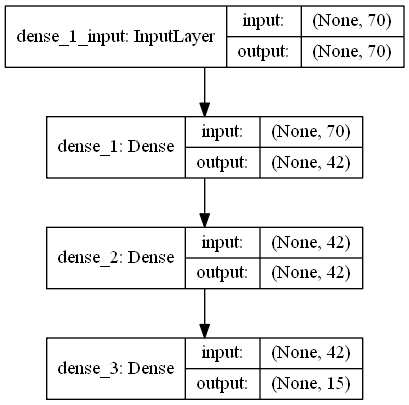

In [36]:
#Visualizing the neural network
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='classifier_plot.png', show_shapes=True, show_layer_names=True)

In [43]:
# Evaluating the model
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred) 
auc_score

0.9026902923643463

In [44]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro') 
f1

0.840455190537483

In [33]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


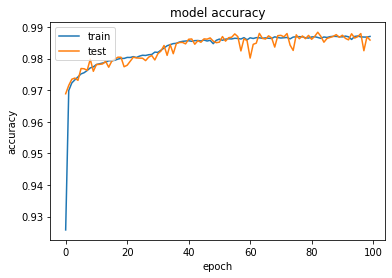

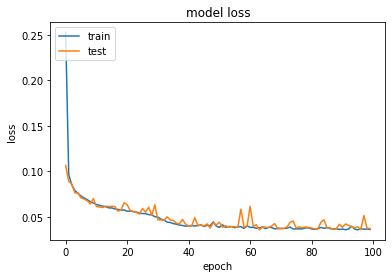

In [34]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# evaluating the model
cvscores = []
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 98.58%
98.58% (+/- 0.00%)


In [45]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test, y_pred, average='macro') 
precision_score

0.985159843997324

In [46]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test, y_pred, average='macro') 
recall_score

0.8056842608639145

In [50]:
# Converting the label column to an array
df2 = df[' Label']
feat = df2.values
label = df2.unique()
label

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack Brute Force', 'Web Attack XSS',
       'Web Attack Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [47]:
# Function to plot confusion matrix for multi-class label
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(20,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[74522    86     5    10   337    21     3     9     0     5    72     7
      0     2     1]
 [  443  1009     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   37     0 38371     2     0     0     0     0     0     0     0     0
      0     0     0]
 [   20     0     0  3080     0     1     0     0     0     0     0     0
      0     0     0]
 [   49     0     0     1 69064     0     0     0     0     0     0     0
      0     0     0]
 [   12     0     0     1     0  1587    11     0     0     0     0     0
      0     0     0]
 [    8     0     0     1     0     8  1753     0     0     0     0     0
      0     0     0]
 [    4     0     0     0     0     0     3  2360     0     0     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0  1426     0     0     0
      0     0     0]
 [    2     0     0     0     0     0     0     0     0  1514     0     0
      0     0     0]
 [    6   

<Figure size 432x288 with 0 Axes>

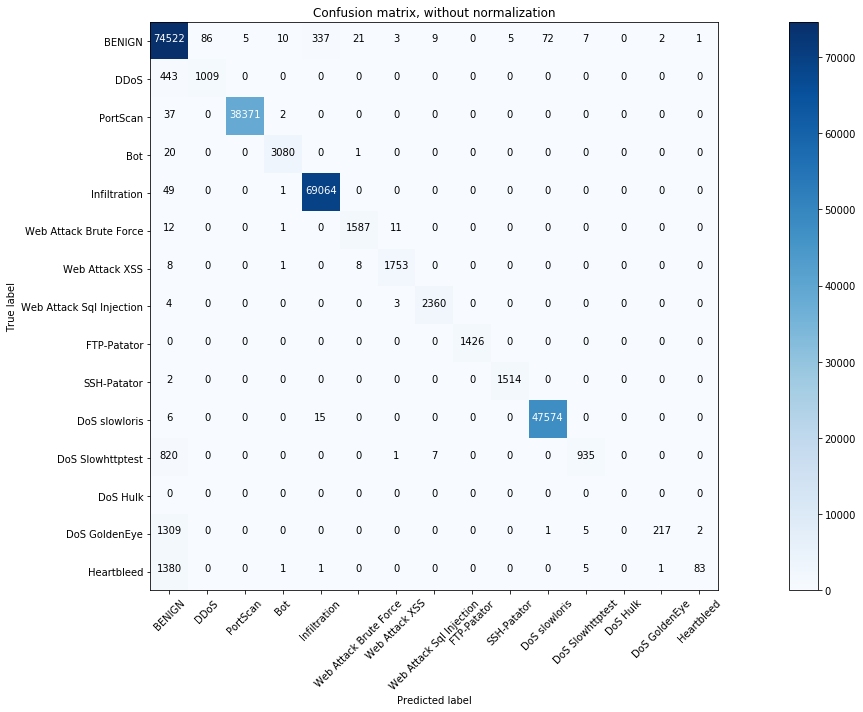

In [51]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1),labels=[0, 1, 2, 3, 4, 5, 6,
                                                                                         7, 8, 9, 10, 11, 12, 12, 14])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix, without normalization')